In [16]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex
%matplotlib inline

        ┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1 


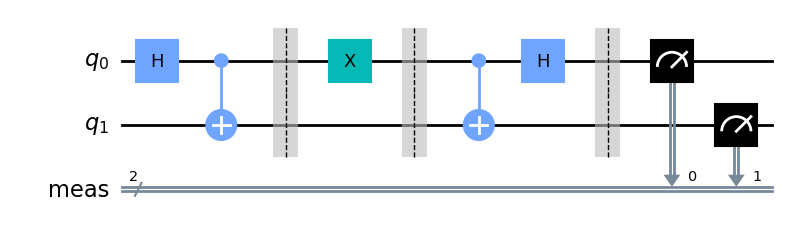

In [17]:
circuit = QuantumCircuit(2) # Quantum Circuit with 2 qubits.

# Prepare the bell state.
circuit.h(0) # Apply the Hadamard gate to qubit 0.
circuit.cnot(0, 1) # Apply the C-NOT gate.
circuit.barrier() # Ensure that all the operations are completed, before continuing beyond the barrier.

# Encode message and transmit the qubit to the receiver.
match message := '10':
    case '00':
        circuit.id(0)
    case '01':
        circuit.z(0)
    case '10':
        circuit.x(0)
    case '11':
        circuit.z(0)
        circuit.x(0)

circuit.barrier()

# Decode message.
circuit.cnot(0, 1)  # Apply the C-NOT gate.
circuit.h(0) # Apply the Hadamard gate to qubit 0.

circuit.measure_all()
print(circuit)
circuit.draw(output = 'mpl') # Draw the circuit diagram.

In [18]:
simulator = Aer.get_backend('statevector_simulator') # Simulate the QC execution.
result = execute(circuit, backend=simulator).result()
state_vector = result.get_statevector()
array_to_latex(state_vector, prefix="\\text{State Vector = }\n") # Visual representation of the vector.

<IPython.core.display.Latex object>

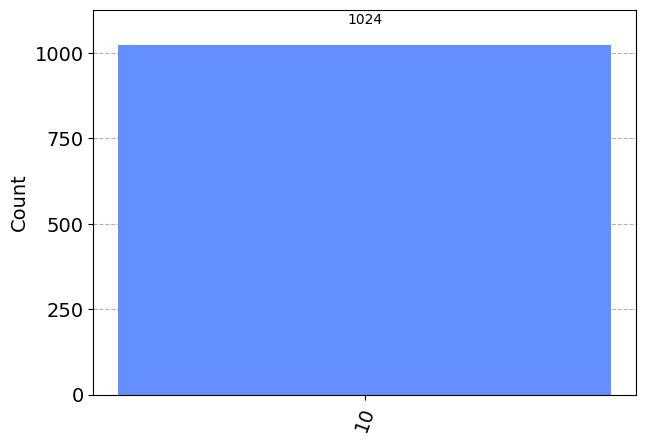

In [19]:
# Simulate the execution of QC.
# QASM = Quantum Assembly Language.
simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=simulator).result()
counts = result.get_counts()
plot_histogram(counts)